## Problem Statement

In this project we will be working with the [**Concrete Compressive Strength Data Set **](http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength) dataset by  **Prof. I-Cheng Yeh** and is made available on [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength). The original dataset provides 8 different features and 1 label. Features include components of concrete and its age. In this assignment, you will use this dataset and [scikit-learn](https://scikit-learn.org/stable/) to create a linear regression model to estimate concrete strength.

## Imports
Let's begin with necessary imports. We will use [`pandas`](https://pandas.pydata.org) for loading the dataset, and [`seaborn`](https://seaborn.pydata.org/index.html), and [`matplotlib`](https://matplotlib.org) for visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Dataset

Let's load the csv file from the location, `./Concrete_Data.csv`. Use the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method from pandas to read the csv file as dataframe and store the dataframe in the `df` variable.

In [2]:
df = pd.read_csv('./Concrete_Data.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In the above dataframe you can see all features and label. The column name for each feature also indicate the unit of measurement for the respective feature. For now let's rename the columns to remove the measurement unit from the column names.

In [3]:
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement', 
                   'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag', 
                   'Water  (component 4)(kg in a m^3 mixture)': 'Water',
                   'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
                   'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer', 
                   'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
                   'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate',
                   'Age (day)': 'Age',
                   'Concrete compressive strength(MPa, megapascals) ': 'Concrete compressive strength',},inplace=True)

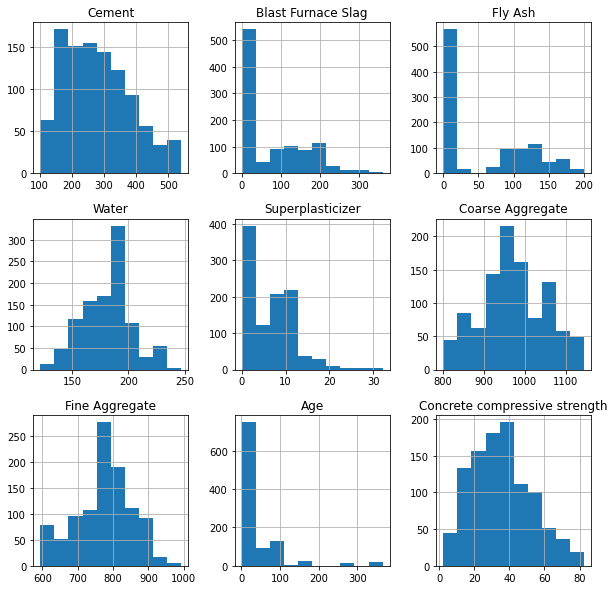

In [4]:
df.hist(figsize=(10, 10))
plt.show()

From the above histogram we can see that our data doesn't have outliers but range of features is very different. Some features range from 0 to 80 while others range from 0 to 500 or 800 to 1100+. In such data it is important to standardize features. Before standardizing features, let's separate train and validation data. 

## Separate features and labels

In [5]:
X = df.drop(columns=['Concrete compressive strength'])
y = df['Concrete compressive strength']

Now, let's divide the dataset into train and validation set using the [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method provided by sklearn. While splitting the data:  

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)

### Standardize training features

To standardize our data, we will use [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from scikit-learn. To standardize a feature value, it subtracts the mean of the feature from the feature value and divides by the standard deviation of the feature. i.e    
$\text{new feature value }(z) = \frac{\text{old feature value }(x)-\mu}{\sigma}$

In [7]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Now, let's visualize the training data.

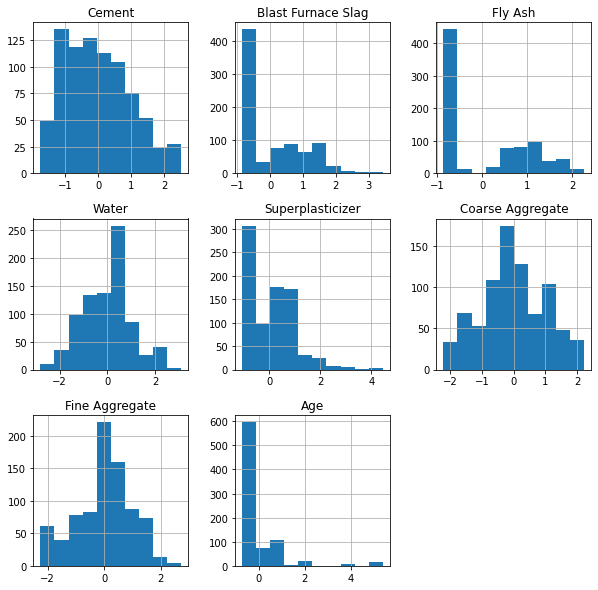

In [8]:
X_train = pd.DataFrame(data=X_train, index=None, columns=df.columns[:-1])
X_train.hist(figsize=(10, 10))
# plt.figure(figsize=(20, 20))
plt.show()

We see that all features now have comparable values within a range of -4 to 6.

## Scale X_valid 

After standardizing the training features, it is compulsory to standardize validation features or features of a test set or validation set if we wish to pass them to our model in future. So, let's use the `transform()` method of the previous `scaler` and pass it the validation data i.e. `X_valid`

In [9]:
X_valid = scaler.transform(X_valid)

## Linear Regression Model

Linear regression is a machine learning model that assusmes a linear relationship between dependent variables(label) and independent variables(features). The regression model then represents this relationship in the form of a linear equation as:

$f(x) = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + \dots$  
where,  
$
a_0 = \text{intercept}   
a_1, a_2, a_3, \dots = \text{coefficients}   
$

Once we find the values of intercept and coefficients, we can find the output of the model for a data point by substituting $x_i$ with respective feature values. 

### Create a Linear Regression Model

The [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) in [`scikit-learn`](https://scikit-learn.org/stable/) allows us to create a linear regression model. 

In [10]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(X_train, y_train)


Now that we have trained the regression model, let's evaluate the performance of the regression model on the training set. We can use the [`score()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) method to find the coefficient of determination($R^2$). $R^2$ measure the goodness of fit for the model. A model that accurately predicts the values of dependent variable will have the $R^2$ score of 1, a model that that always predicts the mean value of dependent variable(baseline model) will have $R^2$ score of 0 and model that are worse than this baseline model will have negative value or $R^2$.


In [11]:
reg.score(X_train, y_train)

0.6090741472770553

We see that the model achieves an R2 score of 0.609 in the training set. 

As mentioned in the description of linear regression, a regression model represents relationship in the form of coefficients and intercept. Let's print out the value of coefficients and intercept of our model using the `intercept_` and `coef_` attributes.

In [12]:
print("Coefficients = ", reg.coef_, " and Intercept = ", reg.intercept_)


Coefficients =  [12.07267128  8.63282574  5.42402928 -3.57981454  1.4872495   1.32860496
  1.40649092  7.01903019]  and Intercept =  36.02692961165048


## Making predictions for unseen instance

In [13]:
y_valid = y_valid.array # Converting y_valid from pandas series to numpy array
X_test = X_valid[12].reshape(1, -1)
y_test = y_valid[12]

###  Make Pediction

In [14]:

predicted_value = reg.predict(X_test)

print("Predicted value = ", predicted_value, "true value = ", y_test)

Predicted value =  [25.16004336] true value =  16.89


We see that the true value for the provided data point, `X_test`, is 16.89 and the value predicted by our model is 25.16004336.

### Compute $R^2$ score on validation set

Earlier, we used the `score()` method to compute $R^2$ score on for the data in training set. Now, use the same method to compute $R^2$ score on for validation data. 



In [15]:

r2_valid = reg.score(X_valid, y_valid)


print("R2 score on validation set is ", r2_valid)

R2 score on validation set is  0.6381566268599906


We see that our regression model achieves an R2 score of 0.638 in the validation set. This is even higher than the R2 score on training set.

## Using Random Forest Regressor

Earlier we used a linear regression model but now let's use a random forest regresssor which is a combination of multiple decision tree regressor.

In [16]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)

# Compute R2 score on training data
r2_train = regr.score(X_train, y_train)
print("R2 score for random forest in training data is {}".format(r2_train))

R2 score for random forest in training data is 0.9846927120820882


We see that the r2 score has greately increased using the random forest regressor. Now, let's also find out if the model does just as well in the validation set. 

In [17]:

r2_valid = regr.score(X_valid, y_valid)


print("R2 score for random forest in training data is {}".format(r2_valid))

R2 score for random forest in training data is 0.922686813804027


We see that the r2 score in validation set is not as high as the training set, but the r2 score has greately improved from 0.63 to 0.92.